# Loan Payment Prediction
An attempt to predict whether a given loan will be paid off or not attempt based on data about loans.
Source of data: https://www.kaggle.com/zhijinzhai/loandata 
The data includes the following columns:
* Loan_ID - a unique loan number assigned to each loan customers
* Loan_status - loan repayment status
* Principal - basic principal loan amount at the origination
* terms - the number of days after which the loan should be repaid
* Effective_date - when the loan got originated and took effects
* Due_date - loan maturity date
* Paidoff_time - the actual time a customer pays off the loan
* Pastdue_days - how many days a loan has been past due
* Age, education, gender - a customer’s basic demographic information

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('Loan payments data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [5]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [6]:
data.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [8]:
{column: len(data[column].unique()) for column in data.columns}

{'Loan_ID': 500,
 'loan_status': 3,
 'Principal': 6,
 'terms': 3,
 'effective_date': 7,
 'due_date': 25,
 'paid_off_time': 321,
 'past_due_days': 34,
 'age': 33,
 'education': 4,
 'Gender': 2}

In [9]:
df = data.copy()
df = df.drop(['Loan_ID', 'paid_off_time', 'past_due_days'], axis = 1)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
...,...,...,...,...,...,...,...,...
495,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,28,High School or Below,male
496,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,26,High School or Below,male
497,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,30,college,male
498,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,38,college,female


In [10]:
for column in ['effective_date', 'due_date']:
        df[column] = pd.to_datetime(df[column])
    
df['effective_day'] = df['effective_date'].apply(lambda x: x.day)
    
df['due_month'] = df['due_date'].apply(lambda x: x.month)
df['due_day'] = df['due_date'].apply(lambda x: x.day)
    
df = df.drop(['effective_date', 'due_date'], axis=1)

In [11]:
df.head()

,loan_status,Principal,terms,age,education,Gender,effective_day,due_month,due_day
0,PAIDOFF,1000,30,45,High School or Below,male,8,10,7
1,PAIDOFF,1000,30,50,Bechalor,female,8,10,7
2,PAIDOFF,1000,30,33,Bechalor,female,8,10,7
3,PAIDOFF,1000,15,27,college,male,8,9,22
4,PAIDOFF,1000,30,28,college,female,9,10,8


In [12]:
data['education'].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [13]:
education_order = [
        'High School or Below',
        'college',
        'Bechalor',
        'Master or Above'
    ]
loan_order = ['COLLECTION','PAIDOFF','COLLECTION_PAIDOFF' ]

In [14]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'male' else 0)
df['education'] = df['education'].apply(lambda x: education_order.index(x))
df['loan_status'] = df['loan_status'].apply(lambda x: loan_order.index(x))

In [15]:
df

,loan_status,Principal,terms,age,education,Gender,effective_day,due_month,due_day
0,1,1000,30,45,0,1,8,10,7
1,1,1000,30,50,2,0,8,10,7
2,1,1000,30,33,2,0,8,10,7
3,1,1000,15,27,1,1,8,9,22
4,1,1000,30,28,1,0,9,10,8
...,...,...,...,...,...,...,...,...,...
495,2,1000,30,28,0,1,12,10,11
496,2,1000,15,26,0,1,12,9,26
497,2,800,15,30,1,1,12,9,26
498,2,1000,30,38,1,0,12,11,10


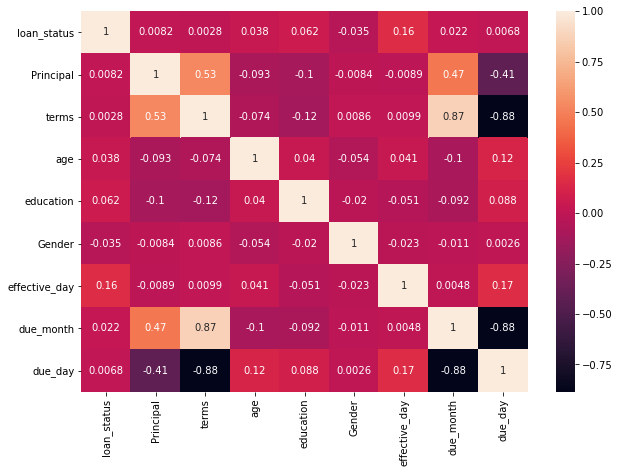

In [16]:
corrMatrix = df.corr()
plt.subplots(figsize=(10,7))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [17]:
y = df['loan_status'].copy()
X = df.drop('loan_status', axis=1).copy()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X

,Principal,terms,age,education,Gender,effective_day,due_month,due_day
0,0.493377,0.897891,2.284043,-1.022825,0.426653,-3.126073,0.664986,-1.303142
1,0.493377,0.897891,3.106587,1.771779,-2.343823,-3.126073,0.664986,-1.303142
2,0.493377,0.897891,0.309935,1.771779,-2.343823,-3.126073,0.664986,-1.303142
3,0.493377,-0.978972,-0.677119,0.374477,0.426653,-3.126073,-1.094236,0.724148
4,0.493377,0.897891,-0.512610,0.374477,-2.343823,-2.209336,0.664986,-1.167989
...,...,...,...,...,...,...,...,...
495,0.493377,0.897891,-0.512610,-1.022825,0.426653,0.540875,0.664986,-0.762531
496,0.493377,-0.978972,-0.841628,-1.022825,0.426653,0.540875,-1.094236,1.264758
497,-1.243866,-0.978972,-0.183592,0.374477,0.426653,0.540875,-1.094236,1.264758
498,0.493377,0.897891,1.132480,0.374477,-2.343823,0.540875,2.424209,-0.897684


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    2
496    2
497    2
498    2
499    2
Name: loan_status, Length: 500, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [63]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)

C:\Users\marty\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest",
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 64.0000%
Support Vector Machine: 60.0000%
         Decision Tree: 56.6667%
        Neural Network: 56.6667%
         Random Forest: 58.0000%


## Conclusions
* the best result is 64%, which is not very satisfying
* it can be assumed that the main reason for such a level of efficiency is data selection - it can be seen from the correlation matrix - the correlation coefficients are close to 0